In [1]:
! cp -r ../input/deepfoodie/inverse_cooking/inverse_cooking/inversecooking/src/* .
!ls

__notebook__.ipynb  build_vocab.py  demo.ipynb	modules    train.py
args.py		    data_loader.py  model.py	sample.py  utils


In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import os
from args import get_parser
import pickle
from model import get_model
from torchvision import transforms
from utils.output_utils import prepare_output
from PIL import Image
import time
%matplotlib inline

In [3]:
# code will run in gpu if available and if the flag is set to True, else it will run on cpu
use_gpu = False
device = torch.device('cuda' if torch.cuda.is_available() and use_gpu else 'cpu')
map_loc = None if torch.cuda.is_available() and use_gpu else 'cpu'

In [4]:
ingrs_vocab = pickle.load(open('../input/deepfoodie/inverse_cooking/inverse_cooking/ingr_vocab.pkl', 'rb'))
vocab = pickle.load(open('../input/deepfoodie/inverse_cooking/inverse_cooking/instr_vocab.pkl', 'rb'))

ingr_vocab_size = len(ingrs_vocab)
instrs_vocab_size = len(vocab)
output_dim = instrs_vocab_size

In [5]:
print (instrs_vocab_size, ingr_vocab_size)

23231 1488


In [6]:
t = time.time()
import sys; sys.argv=['']; del sys
args = get_parser()
args.maxseqlen = 15
args.ingrs_only=False
model = get_model(args, ingr_vocab_size, instrs_vocab_size)
# Load the trained model parameters
model_path = '../input/deepfoodie/inverse_cooking/inverse_cooking/modelbest.ckpt'
model.load_state_dict(torch.load(model_path, map_location=map_loc))
model.to(device)
model.eval()
model.ingrs_only = False
model.recipe_only = False
print ('loaded model')
print ("Elapsed time:", time.time() -t)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/opt/conda/lib/python3.7/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


loaded model
Elapsed time: 7.4350855350494385


In [7]:
transf_list_batch = []
transf_list_batch.append(transforms.ToTensor())
transf_list_batch.append(transforms.Normalize((0.485, 0.456, 0.406), 
                                              (0.229, 0.224, 0.225)))
to_input_transf = transforms.Compose(transf_list_batch)

In [8]:
greedy = [True, False, False, False]
beam = [-1, -1, -1, -1]
temperature = 1.0
numgens = len(greedy)

In [9]:
import requests
from io import BytesIO
import random
from collections import Counter
use_urls = False # set to true to load images from demo_urls instead of those in test_imgs folder
show_anyways = True #if True, it will show the recipe even if it's not valid
image_folder = '../input/deepfoodie/inverse_cooking/inverse_cooking/inversecooking/data/demo_imgs'

if not use_urls:
    demo_imgs = os.listdir(image_folder)
    random.shuffle(demo_imgs)

demo_urls = ['https://food.fnr.sndimg.com/content/dam/images/food/fullset/2013/12/9/0/FNK_Cheesecake_s4x3.jpg.rend.hgtvcom.826.620.suffix/1387411272847.jpeg',
            'https://www.196flavors.com/wp-content/uploads/2014/10/california-roll-3-FP.jpg']

demo_files = demo_urls if use_urls else demo_imgs

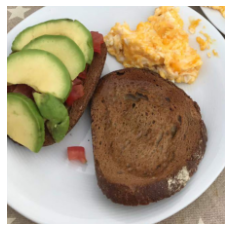

/kaggle/working/modules/multihead_attention.py:128: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:1104.)
  float('-inf'),


RECIPE 1

Title: Avocado egg salad sandwich

Ingredients:
avocado, bread, tomato, mayonnaise, pepper, egg, salt

Instructions:
-Toast bread.
-Spread mayonnaise on one side of each slice.
-Place avocado slices on one slice of bread.
-Top with tomato slices and salt and pepper.
-Top with other slice of bread.
RECIPE 2

Title: Posh egg on toast

Ingredients:
avocado, bread, tomato, mayonnaise, pepper, egg, salt

Instructions:
-Toast the bread, set aside to cool.
-Mix eggs, mayo, and spices.
-Spread over toast.
-Cut avocado and tomato into slices.
-Put on tomato slices.
RECIPE 3

Title: Avocado sandwich

Ingredients:
avocado, bread, tomato, mayonnaise, pepper, egg, salt

Instructions:
-Mash avocado with salt and pepper.
-Spread on one side of each piece of bread.
-Pile on tomato, then egg.
-Add second piece of bread.
-Cut in half and enjoy.
RECIPE 4

Title: Egg sandwich

Ingredients:
avocado, bread, tomato, mayonnaise, pepper, egg, salt

Instructions:
-In a bowl, mash avocado with a fork o

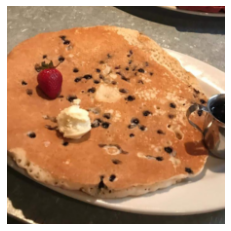

RECIPE 1

Title: Easy pancakes

Ingredients:
sugar, flour, egg, salt, butter, baking_powder, milk, oil

Instructions:
-Mix all ingredients together.
-Heat skillet and pour 1/4 cup of batter onto skillet.
-Cook until bubbles form on top.
-Flip and cook until golden brown.
RECIPE 2

Title: Pancakes (for two)

Ingredients:
sugar, flour, egg, salt, butter, baking_powder, milk, oil

Instructions:
-Mix dry ingredients together.
-Mix wet ingredients and mix together.
-Add to dry mixture and mix well.
-Melt butter in a pan.
-Pour 1/3 cup pancake mixture onto the pan.
-Let cook until golden brown on both sides.
-Serve with butter and syrup !
RECIPE 3

Title: Easy, delicious pancakes

Ingredients:
sugar, flour, egg, salt, butter, baking_powder, milk, oil

Instructions:
-Sift together flour, baking powder and salt and set aside.
-Beat the egg and sugar together with the butter and sugar.
-Gradually stir in the flour mixture into the milk and oil.
-Fold in the beaten eggs and the chopped fruit.
-H

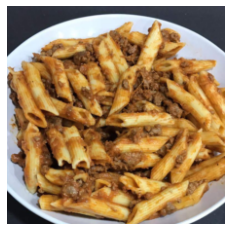

RECIPE 1

Title: Penne with caramelized onions

Ingredients:
cheese, pasta, pepper, onion, oil

Instructions:
-Heat oil in large skillet over medium-high heat.
-Add onions; cook until golden brown, stirring occasionally, about 15 minutes.
-Add pasta and cook until heated through, stirring occasionally, about 10 minutes.
-Season with salt and pepper.
-Sprinkle with cheese.
RECIPE 2

Title: Rigatoni

Ingredients:
cheese, pasta, pepper, onion, oil

Instructions:
-Preheat oven to 400 degrees.
-Heat a large skillet over medium high heat.
-Add the olive oil and onion, and saute until soft.
-Add the rigatoni and cook for 2-3 minutes until lightly browned.
-Add the diced green peppers and stir to coat.
-Season with salt and pepper, and continue to cook over medium heat for about 3-4 minutes, until heated through.
-Add the mozzarella and cook for about another 2-3 minutes until melted, stirring constantly.
-Toss in cooked and drained pasta and serve.
RECIPE 3

Title: Penne

Ingredients:
cheese,

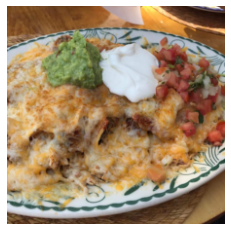

RECIPE 1

Title: Chicken enchiladas

Ingredients:
cheese, tortilla, onion, cream, enchilada_sauce, chicken, chili, beans, pepper, tomato, cumin

Instructions:
-Preheat oven to 350 degrees.
-In a large bowl, combine chicken, beans, tomatoes, onion, green chilies, cumin, and chili powder.
-Spoon about 1/4 cup of the chicken mixture down the center of each tortilla.
-Roll up and place seam side down in a greased 13x9 baking dish.
-Pour enchilada sauce over enchiladas.
-Sprinkle with cheese.
-Bake uncovered for 20 minutes.
RECIPE 2

Title: Chicken tortilla casserole

Ingredients:
cheese, tortilla, onion, cream, enchilada_sauce, chicken, chili, beans, pepper, tomato, cumin

Instructions:
-Spray casserole dish with cooking spray.
-Add chicken, beans, onion and spices to dish, and stir well.
-Cover with enchilada sauce and cheese.
-Bake in 400 oven for 25 minutes.
-Top with sour cream, salsa and enjoy !
-This is great with any other main dish.
RECIPE 3

Title: Chicken enchiladas

Ingredients:

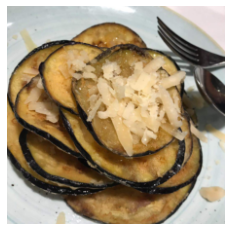

RECIPE 1

Title: Grilled eggplant and zucchini

Ingredients:
zucchini, oil, salt, squash, pepper, eggplant

Instructions:
-Preheat grill to medium-high.
-Brush eggplant slices with oil and season with salt and pepper.
-Grill, turning once, until tender and lightly charred, about 10 minutes.
-Transfer to a platter and let cool.
-Cut into 1/2-inch slices.
-Serve with grilled zucchini.
RECIPE 2

Title: Grilled foil-wrapped eggplant

Ingredients:
zucchini, oil, salt, squash, pepper, eggplant

Instructions:
-Preheat grill to medium-high heat.2.
-Brush zucchini slices with olive oil.
-Sprinkle salt and pepper over eggplant; arrange on a grill rack, and grill 8 minutes or until tender, turning once.
-Sprinkle evenly with chopped zucchini; grill 1 minute or until lightly browned on bottom and browned.
RECIPE 3

Title: Fried squash with salt and pepper

Ingredients:
zucchini, oil, salt, squash, pepper, eggplant

Instructions:
-Heat oil in a large skillet over medium high heat.
-Add the eggplant

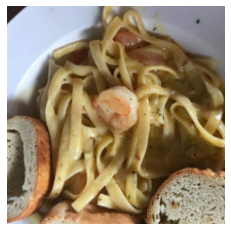

RECIPE 1

Title: Garlic shrimp scampi

Ingredients:
shrimp, pepper, butter, clove, oil, salt, pasta, parsley

Instructions:
-Heat olive oil in a large skillet over medium heat.
-Cook and stir garlic in hot oil until fragrant, about 1 minute.
-Stir shrimp into garlic; cook and stir until shrimp are pink and opaque, about 3 minutes.
-Season with salt and pepper.
-Stir butter into shrimp mixture until melted and sauce is heated through, about 2 minutes.
-Stir parsley into shrimp mixture; cook and stir until heated through, about 1 minute.
RECIPE 2

Title: Garlic, parsley, and butter sauteed shrimp

Ingredients:
shrimp, pepper, butter, clove, oil, salt, pasta, parsley

Instructions:
-In a large skillet, heat the oil with the butter over moderately high heat.
-Add the garlic and saute until the garlic is golden, about 2 minutes.
-Add the shrimp and cook until they are just barely pink, about 2 minutes.
-Season with salt and pepper and serve.
RECIPE 3

Title: Angel hair pasta with garlic and

In [10]:
for img_file in demo_files:
    
    if use_urls:
        response = requests.get(img_file)
        image = Image.open(BytesIO(response.content))
    else:
        image_path = os.path.join(image_folder, img_file)
        image = Image.open(image_path).convert('RGB')
    
    transf_list = []
    transf_list.append(transforms.Resize(256))
    transf_list.append(transforms.CenterCrop(224))
    transform = transforms.Compose(transf_list)
    
    image_transf = transform(image)
    image_tensor = to_input_transf(image_transf).unsqueeze(0).to(device)
    
    plt.imshow(image_transf)
    plt.axis('off')
    plt.show()
    plt.close()
    
    num_valid = 1
    for i in range(numgens):
        with torch.no_grad():
            outputs = model.sample(image_tensor, greedy=greedy[i], 
                                   temperature=temperature, beam=beam[i], true_ingrs=None)
            
        ingr_ids = outputs['ingr_ids'].cpu().numpy()
        recipe_ids = outputs['recipe_ids'].cpu().numpy()
            
        outs, valid = prepare_output(recipe_ids[0], ingr_ids[0], ingrs_vocab, vocab)
        
        if valid['is_valid'] or show_anyways:
            
            print ('RECIPE', num_valid)
            num_valid+=1
            #print ("greedy:", greedy[i], "beam:", beam[i])
    
            BOLD = '\033[1m'
            END = '\033[0m'
            print (BOLD + '\nTitle:' + END,outs['title'])

            print (BOLD + '\nIngredients:'+ END)
            print (', '.join(outs['ingrs']))

            print (BOLD + '\nInstructions:'+END)
            print ('-'+'\n-'.join(outs['recipe']))

            print ('='*20)

        else:
            pass
            print ("Not a valid recipe!")
            print ("Reason: ", valid['reason'])
        